## **Basemap Example**

**Read my Medium Article here:** https://medium.com/@athishakaliannan/how-to-plot-data-on-a-world-map-in-python-25cf9733c3dd?sk=ee7f708fb14ef565dc41071d1c1fbe37

**Packages To Install**

In [1]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756187 sha256=a3b714779226e5cc19ee6f8b1425feac0e90409dd15d9696a7fd8ac34762dea2
  Stored in directory: /tmp/pip-ephem-wheel-cache-6rvvqky3/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


**Import Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams

**Read Dataset**

In [3]:
df=pd.read_csv("/content/cities.csv")

**Explore Dataset**

In [4]:
df.shape

(245, 8)

In [5]:
df.head(3)

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas


**Extracting latitude and longitude features from the dataset**

In [6]:
df=df[['latitude','longitude']]
df.head(3)

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953


In [7]:
df.shape

(245, 2)

**Set the upper bound and lower bound of latitude and longitude**

In [8]:
llat=-58.45
ulat=19.23

llon=-121.61
ulon=-10.55

**Retrieve datapoints in the specified area**

In [9]:
df=df[(df['longitude']>llon) & (df['longitude']<ulon) & 
      (df['latitude']>llat) & (df['latitude']<ulat)]
print("Number of final datapoints:",len(df))

Number of final datapoints: 47


**Plot the map**

In [10]:
my_map=Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,urcrnrlon=ulon, urcrnrlat=ulat)

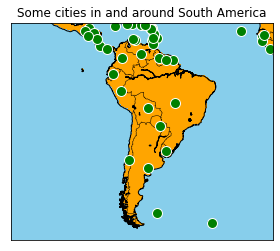

In [11]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
xs,ys = my_map(np.asarray(df.longitude), np.asarray(df.latitude))
df['x']= xs.tolist()
df['y'] =ys.tolist()

for index,row in df.iterrows():
   my_map.plot(row.x,row.y,markerfacecolor='green',
               markeredgecolor='white',marker='o',markersize=10)
plt.title("Some cities in and around South America")

#Download the Map
plt.savefig("ExampleMap.png", dpi=300)

**Display downloaded Image**

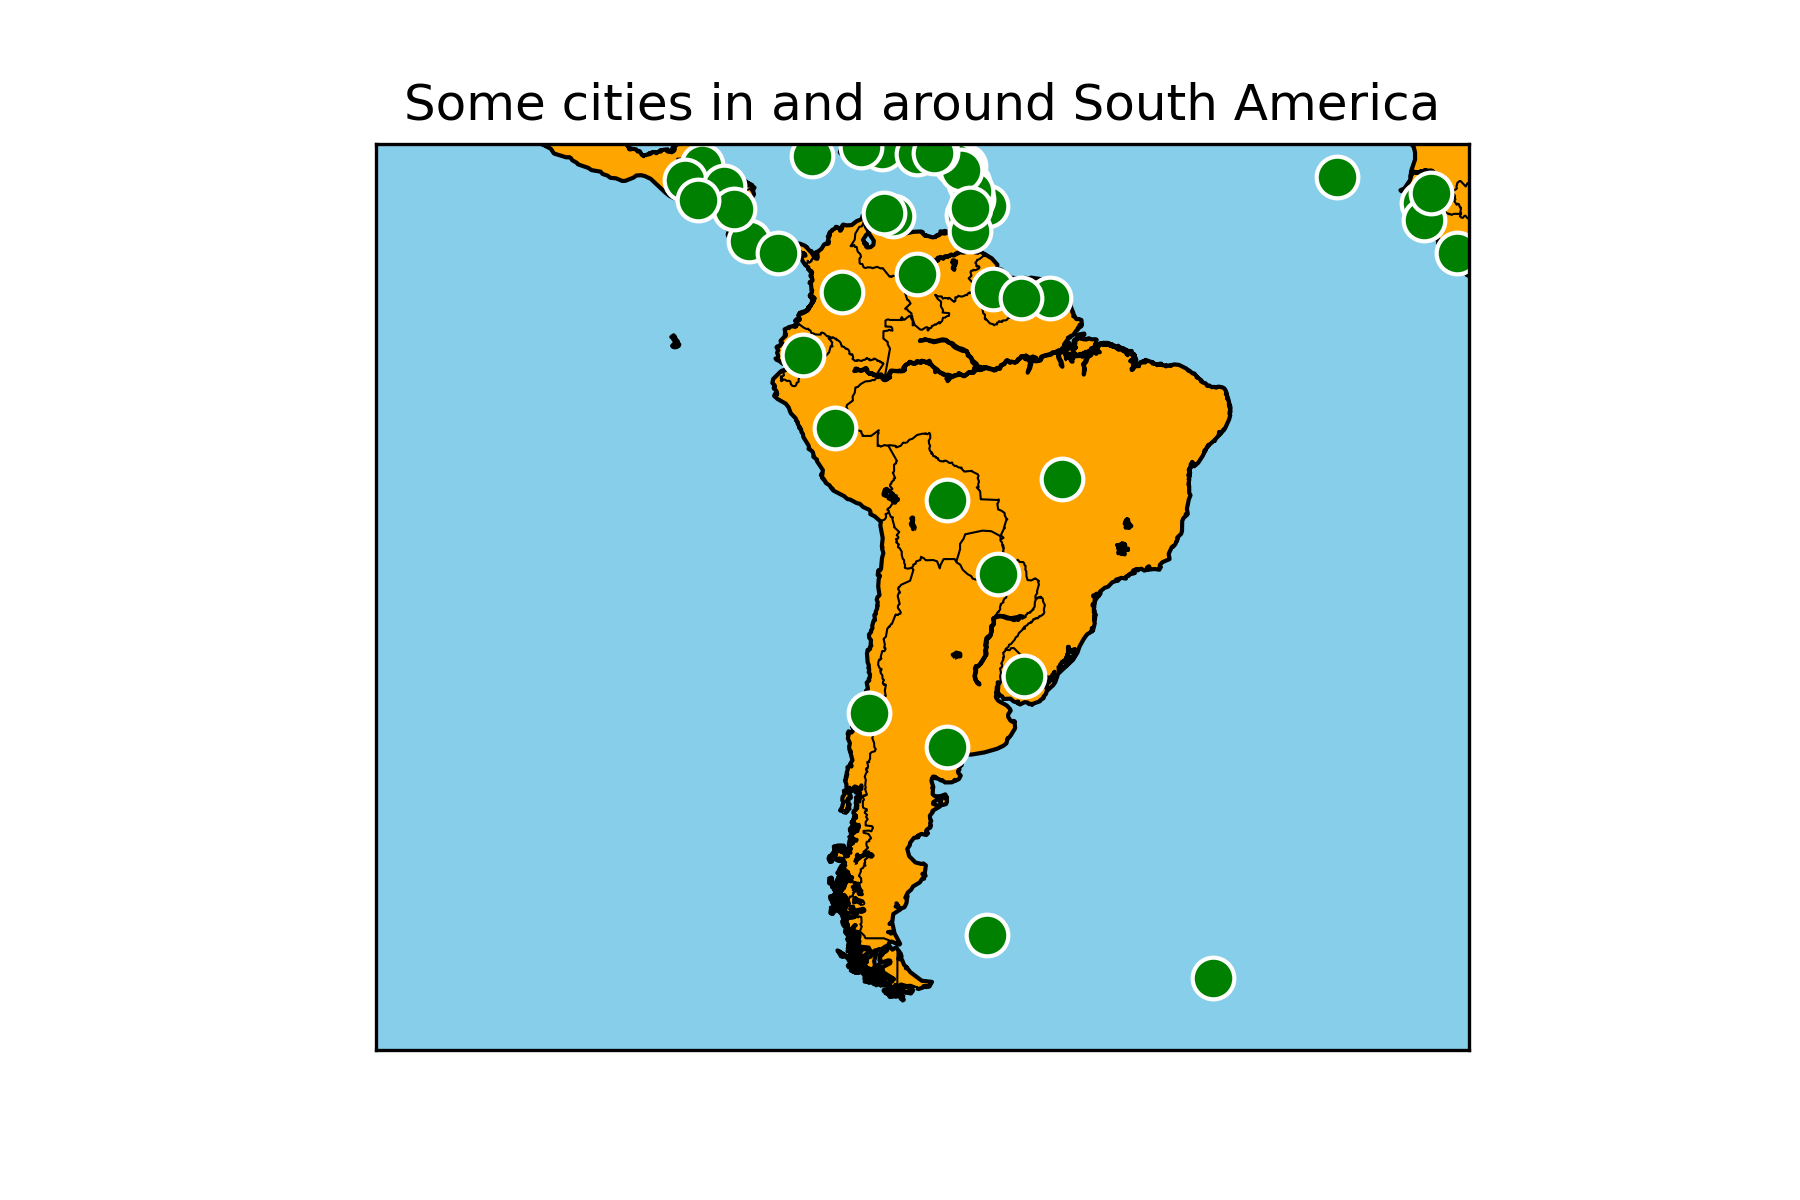

In [12]:
from IPython.display import Image
Image(filename='/content/ExampleMap.png') 